In [2]:
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
import seaborn as sns

import time

In [3]:
data_path = '../data/train'
train_df = pd.read_csv(os.path.join(data_path, 'train_ratings.csv')) # 전체 학습 데이터
year_data = pd.read_csv(os.path.join(data_path, 'years.tsv'), sep='\t')
writer_data = pd.read_csv(os.path.join(data_path, 'writers.tsv'), sep='\t')
title_data = pd.read_csv(os.path.join(data_path, 'titles.tsv'), sep='\t')
genre_data = pd.read_csv(os.path.join(data_path, 'genres.tsv'), sep='\t')
director_data = pd.read_csv(os.path.join(data_path, 'directors.tsv'), sep='\t')

# 기본 정보 확인

## train_df

In [4]:
train_df.head()

,user,item,time
0,11,4643,1230782529
1,11,170,1230782534
2,11,531,1230782539
3,11,616,1230782542
4,11,2140,1230782563


In [5]:
train_df.isna().sum()

user    0
item    0
time    0
dtype: int64

In [6]:
train_df[['user', 'item']].nunique()

user    31360
item     6807
dtype: int64

31360명의 user와 6807개의 영화의 interaction

In [7]:
(train_df.groupby('user')['item'].count() == train_df.groupby('user')['item'].nunique()).all()

True

user별 중복 아이템은 없음

<AxesSubplot: >

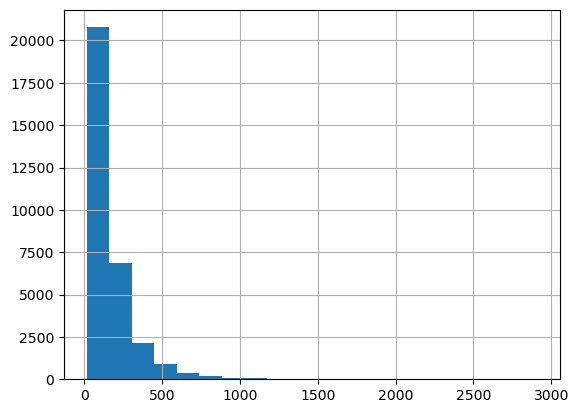

In [8]:
train_df.groupby('user')['item'].count().hist(bins=20)

In [9]:
train_df.groupby('user')['item'].count().describe()

count    31360.000000
mean       164.364509
std        150.009107
min         16.000000
25%         71.000000
50%        114.000000
75%        200.000000
max       2912.000000
Name: item, dtype: float64

user-item interaction을 관람이라고 할때,

유저별 관람 영화 수의 분포를 살펴보면, 최소 16편, 최대 2912편, 평균적으로 164편의 영화를 관람했음

<AxesSubplot: >

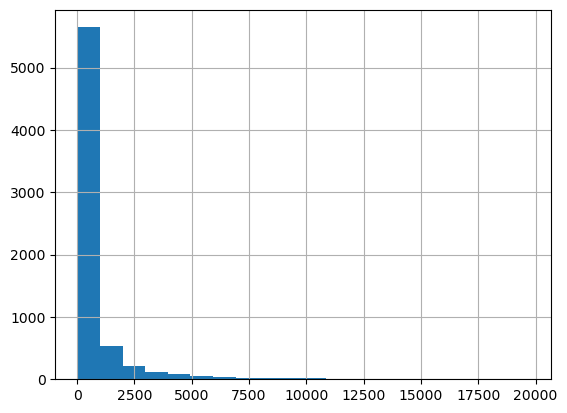

In [10]:
train_df.groupby('item')['user'].count().hist(bins=20)

In [11]:
train_df.groupby('item')['user'].count().describe()

count     6807.000000
mean       757.230939
std       1682.973090
min         27.000000
25%         90.000000
50%        197.000000
75%        610.500000
max      19699.000000
Name: user, dtype: float64

영화별 관람한 유저 수의 분포를 살펴보면, 최소 27명, 최대 19699명, 평균적으로 757명의 영화를 관람했음

In [12]:
train_df['time_convert'] = train_df['time'].apply(lambda t: time.strftime('%Y-%m-%d %H:%M:%S', time.localtime(t)))

## year_data

In [13]:
year_data.shape

(6799, 2)

In [14]:
year_data.nunique()

item    6799
year      93
dtype: int64

`train_df`에 6807개의 영화가 있었던 반면, `year_data`에는 6799개의 영화 존재

In [15]:
set(year_data.item) - set(train_df.item)

set()

In [16]:
set(train_df.item) - set(year_data.item)

{3310, 6987, 6988, 7065, 7243, 8511, 32898, 119145}

`{3310, 6987, 6988, 7065, 7243, 8511, 32898, 119145}` 영화는 개봉연도를 알 수 없는 영화

In [17]:
year_data['year'].unique()

array([1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932,
       1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943,
       1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954,
       1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014])

1922 ~ 2014년까지의 영화인 것을 알 수 있음

<AxesSubplot: >

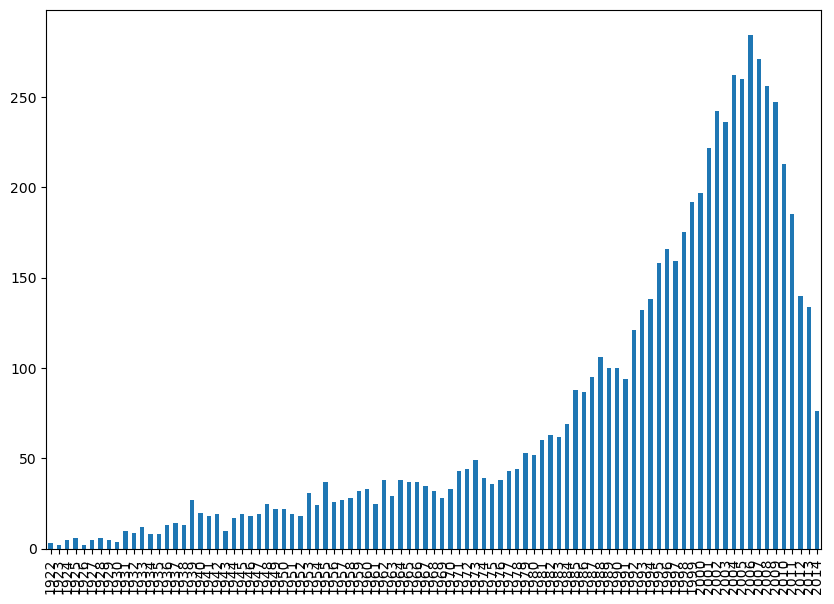

In [18]:
year_data['year'].value_counts().sort_index().plot(kind='bar', figsize=(10,7))

옛날 영화보다는 최근 영화가 많은 것을 알 수 있음

## writer_data

In [19]:
writer_data.shape

(11306, 2)

In [20]:
writer_data.nunique()

item      5648
writer    2989
dtype: int64

In [21]:
6807 - 5648

1159

In [22]:
len(set(train_df['item']) - set(writer_data['item']))

1159

`train_df`에 6807개의 영화가 있었던 반면, `writer_data`에는 5648개의 영화 존재

총 2989명의 각본가 존재

한 영화에 여러 각본가가 존재하기도 하고, 한 각본가가 여러 영화에 참여하기도 함

In [23]:
writer_data['writer'].value_counts().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

한 각본가는 최소 2편, 최대 47편의 영화에 참여했고, 평균적으로 3.8편의 영화에 참여함

## title_data

In [24]:
title_data.head()

,item,title
0,318,"Shawshank Redemption, The (1994)"
1,2571,"Matrix, The (1999)"
2,2959,Fight Club (1999)
3,296,Pulp Fiction (1994)
4,356,Forrest Gump (1994)


In [25]:
title_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6807 entries, 0 to 6806
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    6807 non-null   int64 
 1   title   6807 non-null   object
dtypes: int64(1), object(1)
memory usage: 106.5+ KB


모든 영화의 제목이 존재함을 알 수 있음

## genre_data

In [26]:
genre_data.head()

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller


In [27]:
genre_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15933 entries, 0 to 15932
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   item    15933 non-null  int64 
 1   genre   15933 non-null  object
dtypes: int64(1), object(1)
memory usage: 249.1+ KB


In [28]:
genre_data.nunique()

item     6807
genre      18
dtype: int64

In [29]:
genre_data['item'].value_counts().describe()

count    6807.000000
mean        2.340679
std         1.114049
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        10.000000
Name: item, dtype: float64

모든 영화의 장르 정보가 존재하고, 총 18개의 장르로 구분되어 있음

한 영화에 여러 장르가 포함될 수 있고, 최소 1개, 최대 10개 장르를 포함하며 평균적으로 2.3개의 장르를 포함하고 있음

<AxesSubplot: >

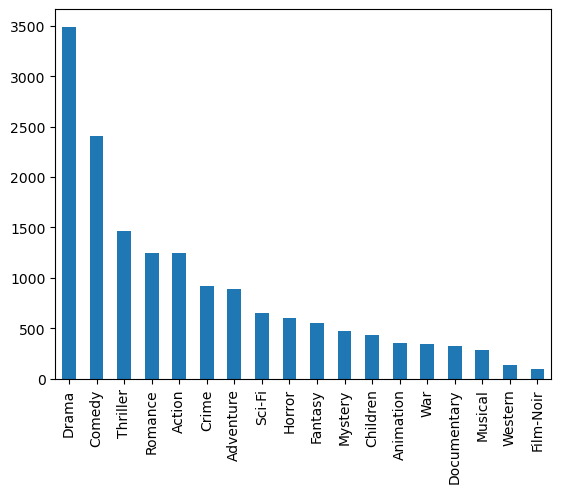

In [30]:
genre_data['genre'].value_counts().plot(kind='bar')

개봉된 영화 중 장르 빈도 분포는 위와 같음

개봉된 연도별로 살펴봐도 좋을 듯

## director_data

In [31]:
director_data.head()

,item,director
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005


In [32]:
director_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5905 entries, 0 to 5904
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   item      5905 non-null   int64 
 1   director  5905 non-null   object
dtypes: int64(1), object(1)
memory usage: 92.4+ KB


In [33]:
director_data.nunique()

item        5503
director    1340
dtype: int64

In [34]:
director_data['item'].value_counts().describe()

count    5503.000000
mean        1.073051
std         0.420017
min         1.000000
25%         1.000000
50%         1.000000
75%         1.000000
max        14.000000
Name: item, dtype: float64

In [35]:
sum(director_data['item'].value_counts()==1)

5220

전체 영화 6807개 중 5503개의 영화의 감독 정보가 존재함

전체 감독 수는 1340명

5220개의 영화만 단일 감독이 연출했으며, 283개의 영화는 2명 이상의 감독이 참여함

# year_data vs 다른 데이터셋

## year_data vs writer_data

In [36]:
year_to_writer = writer_data.merge(year_data, how='left', on='item')

In [37]:
year_to_writer.head()

,item,writer,year
0,1237,nm0000005,1957.0
1,5147,nm0000005,1957.0
2,7327,nm0000005,1966.0
3,2068,nm0000005,1982.0
4,7396,nm0000005,1973.0


In [38]:
year_to_writer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11306 entries, 0 to 11305
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item    11306 non-null  int64  
 1   writer  11306 non-null  object 
 2   year    11290 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 353.3+ KB


In [39]:
year_to_writer[year_to_writer['year'].isna()].item.unique()

array([  3310,   8511,   7065,   7243,   6988,   6987, 119145,  32898])

8개의 영화에 대한 개봉 연도 정보가 없었기 때문에, 16개 행에서 year 결측 발생

In [40]:
# (year_to_writer.groupby('year')['writer'].value_counts().unstack().fillna(0).T / year_to_writer['year'].value_counts().sort_index().values)
count_writer_by_year = year_to_writer[year_to_writer['year']>=1980].groupby('year')['writer'].value_counts().unstack().fillna(0)
for i in range(count_writer_by_year.shape[0]):
    for j in range(count_writer_by_year.shape[1]):
        if count_writer_by_year.iloc[i,j] > 0:
            count_writer_by_year.iloc[i,j] = 1
count_writer_by_year

writer,nm0000005,nm0000040,nm0000041,nm0000076,nm0000092,nm0000095,nm0000100,nm0000101,nm0000108,nm0000110,...,nm3890871,nm4160687,nm4611078,nm4950667,nm4951717,nm5022110,nm5335213,nm5371819,nm5927607,nm5927608
year,,,,,,,,,,,,,,,,,,,,,
1980.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1981.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1982.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1983.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1988.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


<AxesSubplot: xlabel='year', ylabel='writer'>

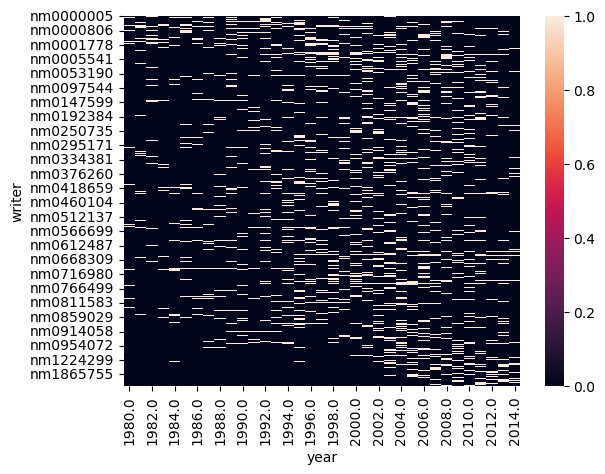

In [41]:
ratio_writer_by_year = year_to_writer.groupby('year')['writer'].value_counts().unstack().fillna(0).T / year_to_writer['year'].value_counts().sort_index().values
# fig, ax = plt.subplots(figsize=(20,50))
sns.heatmap(count_writer_by_year.T)

연도별로 특정 각본가의 작품이 꾸준히 개봉되기도 했지만 특별한 경향은 찾지 못함

## year_data vs genre_data

In [42]:
year_to_genre = genre_data.merge(year_data, how='left', on='item')

In [43]:
year_to_genre.head()

,item,genre,year
0,318,Crime,1994.0
1,318,Drama,1994.0
2,2571,Action,1999.0
3,2571,Sci-Fi,1999.0
4,2571,Thriller,1999.0


In [44]:
year_to_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15933 entries, 0 to 15932
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   item    15933 non-null  int64  
 1   genre   15933 non-null  object 
 2   year    15914 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 497.9+ KB


In [45]:
ratio_genre_by_year = year_to_genre[year_to_genre['year']>=1980].groupby('year')['genre'].value_counts().unstack().fillna(0).T / year_to_genre[year_to_genre['year']>=1980]['year'].value_counts().sort_index().values
ratio_genre_by_year

year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
genre,,,,,,,,,,,,,,,,,,,,,
Action,0.093750,0.102362,0.068966,0.071429,0.070968,0.081731,0.077295,0.078947,0.081301,0.088106,...,0.083707,0.061693,0.062215,0.101587,0.076563,0.102616,0.105263,0.112121,0.123418,0.162011
Adventure,0.083333,0.086614,0.062069,0.055556,0.116129,0.110577,0.086957,0.043860,0.044715,0.057269,...,0.058296,0.057389,0.048558,0.066667,0.042188,0.048290,0.064073,0.066667,0.079114,0.083799
Animation,0.010417,0.023622,0.034483,0.000000,0.006452,0.004808,0.019324,0.021930,0.028455,0.030837,...,0.017937,0.028694,0.022762,0.030159,0.035937,0.026157,0.027460,0.039394,0.028481,0.027933
Children,0.010417,0.023622,0.041379,0.015873,0.019355,0.043269,0.028986,0.021930,0.024390,0.035242,...,0.032885,0.021521,0.024279,0.023810,0.017188,0.024145,0.022883,0.012121,0.009494,0.022346
Comedy,0.187500,0.102362,0.151724,0.174603,0.154839,0.177885,0.178744,0.210526,0.182927,0.193833,...,0.158445,0.152080,0.141123,0.136508,0.137500,0.134809,0.144165,0.133333,0.126582,0.128492
Crime,0.031250,0.031496,0.027586,0.039683,0.038710,0.033654,0.057971,0.048246,0.060976,0.074890,...,0.067265,0.053085,0.066768,0.063492,0.056250,0.042254,0.048055,0.054545,0.066456,0.055866
Documentary,0.010417,0.015748,0.027586,0.039683,0.012903,0.009615,0.000000,0.004386,0.020325,0.008811,...,0.029895,0.034433,0.033384,0.026984,0.021875,0.036217,0.029748,0.036364,0.015823,0.005587
Drama,0.229167,0.204724,0.179310,0.214286,0.187097,0.153846,0.198068,0.179825,0.195122,0.211454,...,0.222720,0.225251,0.218513,0.200000,0.209375,0.211268,0.215103,0.212121,0.196203,0.195531
Fantasy,0.000000,0.039370,0.048276,0.031746,0.051613,0.057692,0.033816,0.039474,0.048780,0.039648,...,0.025411,0.048780,0.039454,0.039683,0.042188,0.046278,0.036613,0.045455,0.044304,0.027933


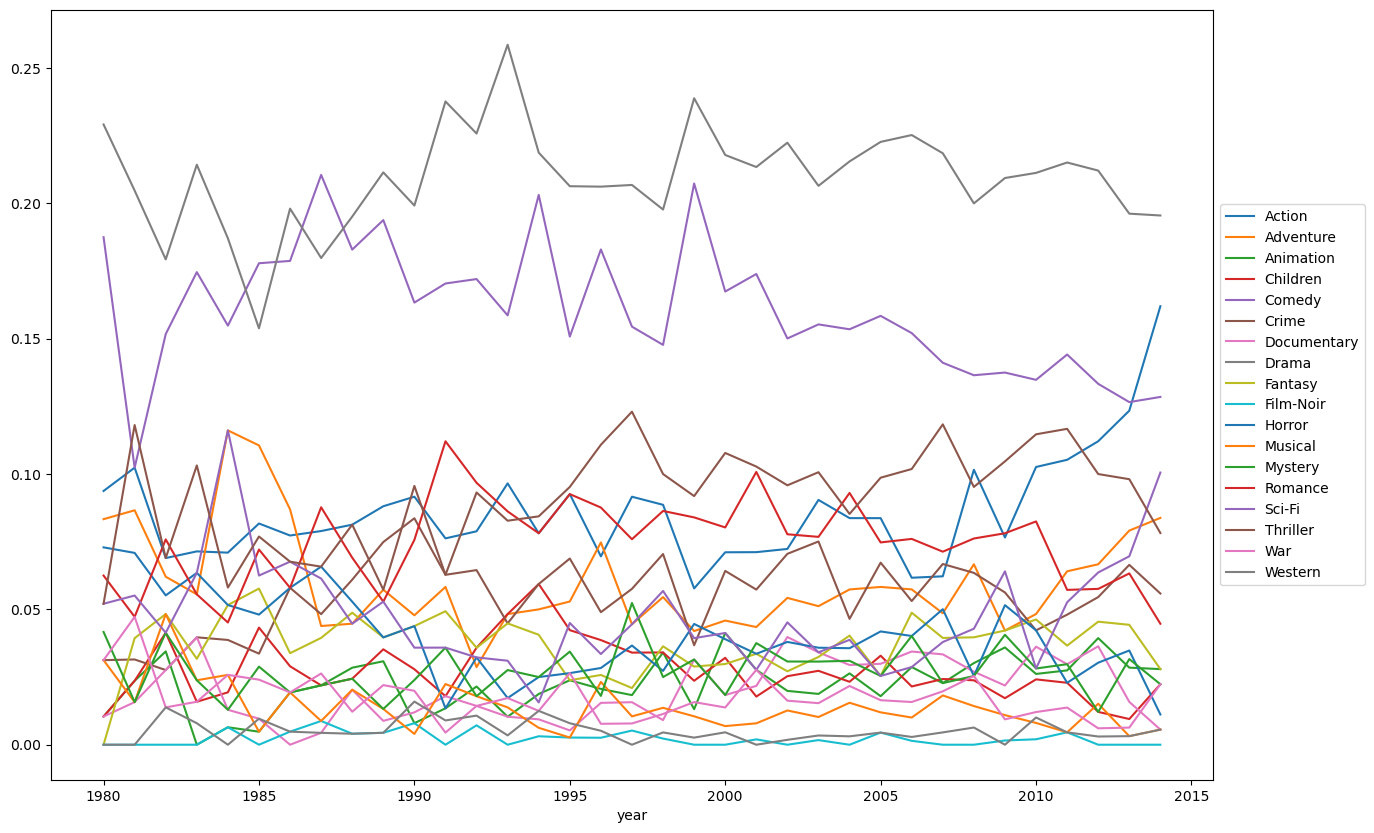

In [46]:
ratio_genre_by_year.T.plot(kind='line', figsize=(15,10))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: xlabel='year', ylabel='genre'>

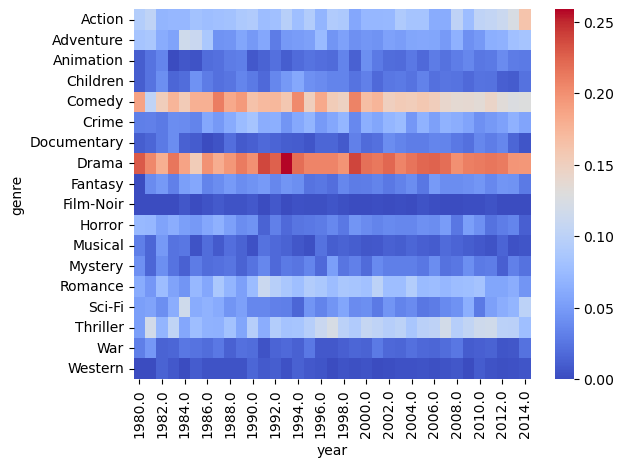

In [47]:
sns.heatmap(ratio_genre_by_year,cmap='coolwarm')

1980년 이전 연도별 개봉된 영화가 적다고 판단하여 이후 개봉된 영화를 대상으로 연도별 개봉된 영화 장르 비율 시각화한 결과,



## year_data vs director_data

In [48]:
year_to_director = director_data.merge(year_data, how='left', on='item')

In [49]:
year_to_director.head()

,item,director,year
0,1237,nm0000005,1957.0
1,5147,nm0000005,1957.0
2,7327,nm0000005,1966.0
3,2068,nm0000005,1982.0
4,7396,nm0000005,1973.0


In [50]:
year_to_director.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5905 entries, 0 to 5904
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   item      5905 non-null   int64  
 1   director  5905 non-null   object 
 2   year      5899 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 184.5+ KB


In [51]:
ratio_director_by_year = year_to_director[year_to_director['year']>=1980].groupby('year')['director'].value_counts().unstack().fillna(0).T / year_to_director[year_to_director['year']>=1980]['year'].value_counts().sort_index().values
ratio_director_by_year

year,1980.0,1981.0,1982.0,1983.0,1984.0,1985.0,1986.0,1987.0,1988.0,1989.0,...,2005.0,2006.0,2007.0,2008.0,2009.0,2010.0,2011.0,2012.0,2013.0,2014.0
director,,,,,,,,,,,,,,,,,,,,,
nm0000005,0.000000,0.0,0.017857,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nm0000040,0.020833,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.011905,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nm0000041,0.020833,0.0,0.000000,0.000000,0.000000,0.012821,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nm0000076,0.020833,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
nm0000095,0.020833,0.0,0.017857,0.018182,0.014925,0.012821,0.013514,0.011905,0.011765,0.022727,...,0.004831,0.004219,0.004717,0.005155,0.005181,0.005917,0.006329,0.008547,0.009434,0.015152
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
nm2588606,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.005155,0.000000,0.000000,0.006329,0.000000,0.009434,0.000000
nm2648685,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.006329,0.000000,0.000000,0.015152
nm2676052,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.005917,0.000000,0.000000,0.009434,0.000000


<AxesSubplot: xlabel='year', ylabel='director'>

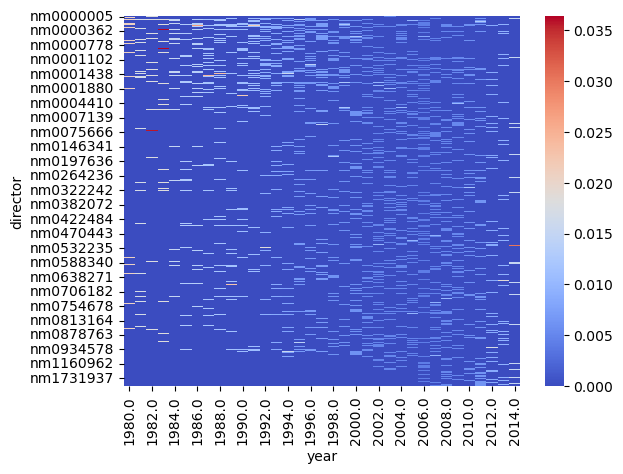

In [52]:
sns.heatmap(ratio_director_by_year,cmap='coolwarm')

# 팀 퀘스트

## writer, genre별 수, writer, director별 수, writer, year별 수

In [77]:
writer_data['writer'].value_counts().describe()

count    2989.000000
mean        3.782536
std         2.993783
min         2.000000
25%         2.000000
50%         3.000000
75%         4.000000
max        47.000000
Name: writer, dtype: float64

In [82]:
from math import factorial
factorial(18)

6402373705728000

In [89]:
genre_data.groupby('item')['genre'].apply(lambda x: ', '.join(sorted(x.tolist()))).nunique()

759

In [94]:
genre_data.groupby('item')['genre'].apply(lambda x: ', '.join(sorted(x.tolist()))).reset_index().genre.value_counts().head(50)

Drama                                  832
Comedy                                 464
Comedy, Drama                          308
Drama, Romance                         297
Comedy, Romance                        246
Documentary                            229
Comedy, Drama, Romance                 228
Drama, Thriller                        132
Crime, Drama                           107
Drama, War                             100
Crime, Drama, Thriller                 100
Horror                                  82
Horror, Thriller                        82
Comedy, Crime                           67
Action, Adventure, Sci-Fi               60
Action, Comedy                          53
Action, Crime, Drama, Thriller          52
Action, Crime, Thriller                 52
Thriller                                46
Children, Comedy                        46
Action, Drama, War                      45
Action, Thriller                        43
Adventure, Drama                        43
Action, Sci

총 6809개 영화의 장르 조합 수는 759개

In [70]:
writer_to_genre = writer_data.merge(genre_data, how='left', on='item')

<AxesSubplot: xlabel='writer', ylabel='cnt'>

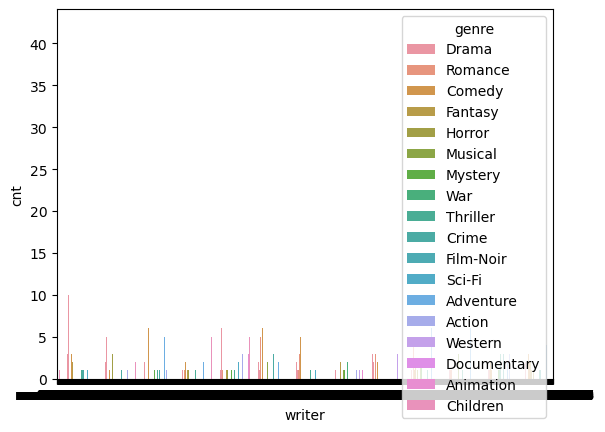

In [116]:
writer_to_genre.groupby('writer')['genre'].value_counts().rename('cnt').reset_index()
sns.barplot(x='writer', y='cnt', data=writer_to_genre.groupby('writer')['genre'].value_counts().rename('cnt').reset_index(), hue='genre')

In [66]:
writer_data[writer_data['writer']=='nm0000005']

,item,writer
0,1237,nm0000005
1,5147,nm0000005
2,7327,nm0000005
3,2068,nm0000005
4,7396,nm0000005
5,4422,nm0000005
6,7939,nm0000005
7,7938,nm0000005
8,7941,nm0000005
9,7937,nm0000005


In [64]:
genre_data[genre_data['item'] == 2068]

,item,genre
3304,2068,Drama
3305,2068,Fantasy
3306,2068,Mystery


In [54]:
genre_data

,item,genre
0,318,Crime
1,318,Drama
2,2571,Action
3,2571,Sci-Fi
4,2571,Thriller
...,...,...
15928,109850,Drama
15929,8605,Action
15930,8605,Comedy
15931,3689,Comedy


## interaction year - 개봉 연도 분포

In [117]:
train_df

,user,item,time,time_convert
0,11,4643,1230782529,2009-01-01 04:02:09
1,11,170,1230782534,2009-01-01 04:02:14
2,11,531,1230782539,2009-01-01 04:02:19
3,11,616,1230782542,2009-01-01 04:02:22
4,11,2140,1230782563,2009-01-01 04:02:43
...,...,...,...,...
5154466,138493,44022,1260209449,2009-12-07 18:10:49
5154467,138493,4958,1260209482,2009-12-07 18:11:22
5154468,138493,68319,1260209720,2009-12-07 18:15:20
5154469,138493,40819,1260209726,2009-12-07 18:15:26


In [118]:
year_data

,item,year
0,1348,1922
1,44587,1922
2,4768,1922
3,8235,1923
4,8609,1923
...,...,...
6794,114795,2014
6795,110771,2014
6796,112804,2014
6797,113378,2014
